In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()   #iris dataset exported from sklearn library


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
dir(iris)  #displaying the feautures

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target   #creating a target variable.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names   #showing the three different names for the types of iris flowers.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df[df.target==1].head()  #showing target with number 1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
#creating another column called flower name from the target column using the lambda function
#it selects the target and gives it its flower name.
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
df0 = df[:50]    #checking the order of the targets.
df1 = df[50:100]
df2 = df[100:]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


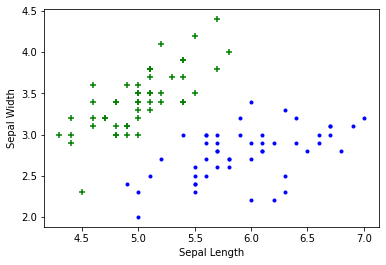

In [16]:
#raph Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

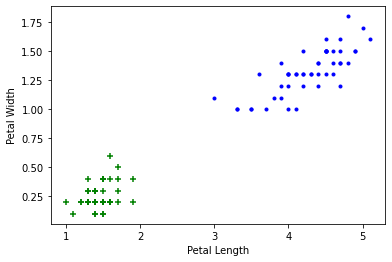

In [17]:

#petal length vs petal Width (Setosa vs Versicolor)...which shows very clear boundary btn the data points.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [18]:
#Training the model using sklearn.
from sklearn.model_selection import train_test_split

In [19]:
#Dropping columns, target and flower name.
X = df.drop(['target','flower_name'], axis='columns')  #x variables contain the data frame without the target and flower name
y = df.target  #y variables contain the target column only

In [20]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
len(X_train)

120

In [24]:
len(X_test)

30

In [25]:
from sklearn.svm import SVC
model = SVC()

In [26]:
model.fit(X_train, y_train)  #fit method for training the model

SVC()

In [27]:
#checking the accuracy of the model.
model.score(X_test, y_test)

0.9333333333333333

In [28]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

# Tune parameters

In [29]:
# 1. Regularization (C)
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [30]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [31]:
# 2. Gamma
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9

In [32]:
# 3. Kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667

# SVM from Statquest

In [2]:
df = pd.read_csv("default_of_credit_card_clients.csv", header = 1, sep="\t")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [1]:
import pandas as pd #for loading, manipulating and one hot encoding
import numpy as np #data manipulation
import matplotlib.pyplot as plt #drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample #downsample the daaset
from sklearn.model_selection import train_test_split #for spliting into test and train
from sklearn.preprocessing import scale  #scale and center data
from sklearn.svm import SVC #used for svm for classification
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import confusion_matrix #creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix #draws a confusion matrix
from sklearn.decomposition import PCA #to perform PCA to plot data

In [3]:
#The last column name (default payment next month) is long.We change it to default.
df.rename({"default payment next month" : "DEFAULT"}, axis="columns", inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.drop("ID", axis=1, inplace=True) #removing the ID column by droping it since the values in the ID column were randomlynassignedmaking ituninformative.
df.head()  #NOTE: set axis=0 to remove rows, axis=1 to remove columns.

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


DEALING MISSING DATA

Missing data is simply a blank space, or a surrogate value like NA, that indicates that we faild to collect data for one 
of the features. We can deal with the missing data by:
    1. we can remove the rows that contain the missing data from the dataset.but it wastes all of other values that we collected.
    2. we can impute the values that are missing, meaning we can make an educated guess about what the value should be
    i.e we can fill the missing value with the average or median of that variable

In [5]:
df.dtypes  #to identify the missing data, lets first check the data types

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

We see that every column is int64, this is good, since it tells us that they didnot mix letters and numbers
In other words, there are no NA values, or other character based place holders for missing data, in df.

But we should still make sur each column contains acceptable values.

In [6]:
#Gender (1 = male; 2 = female).
#Let us check if sex 1 and 2
df["SEX"].unique()

array([2, 1])

In [7]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [8]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [9]:
#With the guess that 0 represents missing value
#lets check how many rows contain missing values.
len(df.loc[(df["EDUCATION"] == 0) | (df["MARRIAGE"] == 0)])

68

In [34]:
len(df) #counting the number of rows in the dataset

30000

In [10]:
#So 68 of the 30000 rows, or less than 1% contain missing values. Since that still leaves us with more data,
#then we need for SVM to remove the rows with missing values rather than try to impute values.
df_no_missing = df.loc[(df["EDUCATION"] !=0) & (df["MARRIAGE"] != 0)]

In [36]:
df_no_missing.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
len(df_no_missing)

29932

In [12]:
#Checking if EDUCATION has no missing values, i.e has no 0 
df_no_missing["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6])

In [13]:
df_no_missing["MARRIAGE"].unique()

array([1, 2, 3])

DOWNSAMPLE THE DATA

SVM are great with small datasets,but not with large ones, and this dataset, while not huge, is big enough to take 
a long time to optimize with cross validation. So we will downsample both categories, customers who di and didnot default
to 100 each.
So to downsample, we are going to split the data into two dataframes,one for people that didnot default and one for people tha did 

In [14]:
df_no_default = df_no_missing[df_no_missing["DEFAULT"] == 0]
df_default = df_no_missing[df_no_missing["DEFAULT"] == 1]

In [15]:
df_no_default_downsampled = resample(df_no_default,
                                     replace=False,
                                     n_samples=1000,
                                     random_state=42)
len(df_no_default_downsampled)

1000

In [16]:
df_default_downsampled = resample(df_default,
                                     replace=False,
                                     n_samples=1000,
                                     random_state=42)
len(df_default_downsampled)

1000

In [17]:
#Now lets merge the two downsampled datasets into a single dataframe and printout the total number
#of samples 
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

Splitting the data into dependent and independent variables

In [18]:
X = df_downsample.drop("DEFAULT", axis=1).copy() 
X.head() #dropping off the default column(which is the x variables)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [19]:
y = df_downsample["DEFAULT"].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

One Hot encoding 
to deal with the categorical data usiing dummies

In [20]:
X_encoded = pd.get_dummies(X, columns=["SEX",
                                      "EDUCATION",
                                      "MARRIAGE",
                                      "PAY_0",
                                      "PAY_2",
                                      "PAY_3",
                                      "PAY_4",
                                      "PAY_5",
                                      "PAY_6"])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [21]:
pd.get_dummies(X, columns=["MARRIAGE"]).head()   #just checking for marriage
                                      

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [22]:
#The Radial basis function(RBF) that we are using with the SVM assumnes that the data are centered and scaled
#In otherwords, each column shd have a mean value=0 and a standard deviation=1. So we need to do this to both the 
#trainig and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Build a preliminary support vector machine

In [23]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

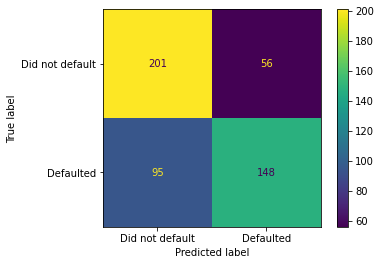

In [24]:
#Checking how the SVM will perform on the testing dataset and draw a confusion matrix.
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format="d",
                     display_labels=["Did not default", "Defaulted"])

In the confusion matrix, we see that of the 257 people that didnot default, 201(79%) were correctly classified.
And of the 243 people that efaulted, 148(61%) were corectly classified.So the SVM was not awesome. So let us try 
to improve predictions using cross validation to optimize the parameters.

# Optimize parameters with cross validation and GridSearchCV()

Optimising a SVM is all about finding the best value for gamma, and, potentially, the regulation parameter
,C. So let's see if wee can find better parameters values using cross validation in hope that we can improve the
accuracy with the testing dataset.
Since we have two parameters to optimize, we will use the GridSearchCV().We specify a bunch of potential values
for gamma and C, and GridSearchCV() tests all possible combinations of the parameters for us.

In [25]:
#Goal:finding the best value of gamma and potentially the regularisation parameter C, 
#by specifiying the parameters we wnat to try
param_grid = [
    {"C": [0.5, 1, 10, 100],  #NOTE: Values for C must be > 0
    "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"]},
]
## NOTE: We are including C=1 and gamma="scale"
## as possible choices since they are the default values.

optimal_params = GridSearchCV(
        SVC(),   #passing in the shell of SVC
        param_grid,  #Passing the parameters we are trying out as stated above
        cv=5,
        scoring="accuracy",#passing the scoring metric we wnat to use, and there are quiet alot of options.
        verbose=0
    )

optimal_params.fit(X_train_scaled, y_train)  #running the cross validation on the parameter values using the training dataset.
print(optimal_params.best_params_)  #printing out the optimal or best parameters

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


We see that the ideal value of C is 100, which means we will use regularization and the ideal value for gamma is 
0.001

# Building,Evaluating, Drawing and interpreting the final SVM

Now that we have the ideal values for C and gamma we can build the final SVM

In [26]:
clf_svm = SVC(random_state=42, C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

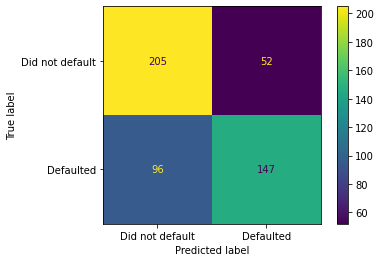

In [27]:
#plotting the confusion matrix to see if the optimized svm does better.
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format="d",
                     display_labels=["Did not default", "Defaulted"])

And the results from the optimized SVM are just a little bit better than before. 4 more people were correctly classified
as not defaulting and only 1 more person was incorrectly classified as defaulting.

So, the SVM was prety good straight out of the box without much optimization. This makes SVMs a great
quick and dirty method for relatively small datasets

NOTE: Although classification with this dataset and an SVM is not awesome, it may be betterthan other methods
    We would have to compare to find out

Let us draw a support machine decision boundary.

In [28]:
#Counting the number of columns in X
len(df_downsample.columns)

24

We have 24 features, or columns in X.this has a challenge that it would reqiure 24 dimensional graph, instead
we will use PCA to combine the 24 features into 2 orthogoanlmeta-featuresthat we can use as axes for a graph


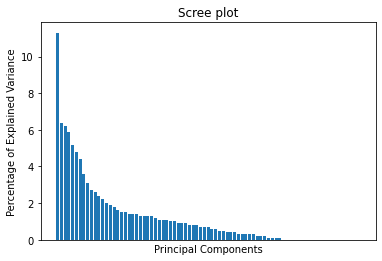

In [29]:
pca = PCA() #By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis="x",        #changes apply to the x-axis
    which="both",    #both major and minor ticks are affected
    bottom=False,    #ticks along the bottom edge are off
    top=False,      #ticks along the top edge are off
    labelbottom=False)   #labels along the top edge are off.
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree plot")
plt.show()
#Scree plot tells us how good this approximation of the true classifier is

In [36]:
#Drawing the PCA graph.
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]
#pc1 contains the x-axis coordinator of the data after PCA
#pc2 contains the y-axis coordinator of the data after PCA

#Now center and scale the PCs....
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

#Now,we optimize the SVM fit to the x and y axis coordinates
# of the data after PCA dimension reduction

param_grid = [
    {"C": [0.5, 1, 10, 100],  #NOTE: Values for C must be > 0
    "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"]},
]
## NOTE: We are including C=1 and gamma="scale"
## as possible choices since they are the default values.

optimal_params = GridSearchCV(
        SVC(),   #passing in the shell of SVC
        param_grid,  #Passing the parameters we are trying out as stated above
        cv=5,
        scoring="accuracy",#passing the scoring metric we wnat to use, and there are quiet alot of options.
        verbose=0
    )

optimal_params.fit(X_train_scaled, y_train)  #running the cross validation on the parameter values using the training dataset.
print(optimal_params.best_params_)  #printing out the optimal or best parameters

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


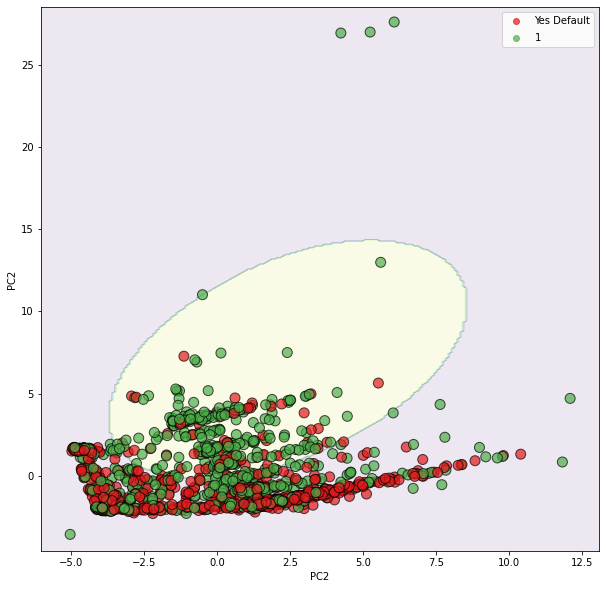

In [40]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

#Transform the test dataset wth the PCA..
X_test_pca = pca.transform(X_train_scaled)

test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]

#Now create a matrix of points that we can use to show
#the decision regions.
#the matrix will be a little bit larger than the 
#transformed PCA points so that we can plot all of
#the PCA points on it without them being on the edge

x_min = test_pc1_coords.min() -1
x_max = test_pc1_coords.max() +1

y_min = test_pc2_coords.min() -1
y_max = test_pc2_coords.max() +1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(["#e41a1c", "#4daf4a"])

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
                    cmap=cmap,
                    s=100,
                    edgecolors="k",
                    alpha=0.7)

#creating a legend.

legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                   loc="upper right")

legend.get_texts()[0].set_text("No Default")
legend.get_texts()[0].set_text("Yes Default")

#Adding axis, labels and titles.

ax.set_ylabel("PC2")
ax.set_xlabel("PC2")
plt.show()

